
## Some Important Explanations that you may need

### rgen ------------>
* `np.random.RandomState` is a class in NumPy that provides a way to create a random number generator.
* `self.random_state` is an attribute of the class this code is a part of. It is likely an integer or None.
* By passing `self.random_state` to RandomState, you are ensuring reproducibility.

* If you use the same random_state, you will get the `same sequence of random numbers`, which is useful for debugging and consistent results.


### self.w_ -------------->
* `self.w_ `is an attribute of the class, representing the weights of a model .
* `rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])` generates random numbers from a normal (Gaussian) distribution.

* * `loc=0.0` sets the mean (center) of the distribution to 0.0.
* * `scale=0.01` sets the standard deviation (spread or "width") of the distribution to 0.01.
* * `size=X.shape[1]` determines the number of random numbers to generate. X.shape[1] is the number of features (columns) in the dataset X. This means you are creating one weight for each feature.

* The result is an array of random numbers, which is assigned to self.w_. These numbers represent the initial weights for the model, and initializing them with small random values is a common practice to break symmetry and start the learning process.

### self.b_ -------------->
* `self.b_` is bias or threshold

In [14]:
import numpy as np
class Perceptron:
  """Perceptron classifier.

  Parameters
  -----------
  eta: float
    Learning rate(between 0.0 and 1.0)
  n_iter: int (epochs)
    Pass over the training dataset.
  random_state: int
    Random number generator seed for random weight
    initialization.


  Attributes
  -----------
  w_ : 1d-array
    Weights after fitting.
  b_: Scaler
    Bias unit after fitting

  errors_: list
    Number of misclassification (updates) in each epoch.
  """

  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state


  def fit(self, X, y):
    """Fit training data.

    Parameters
    ----------
    X: {array-like}, shape=[n_examples, n_feature].
      Trainig vectors, where n_examples is the number of
      examples and n_features is the number of features.
    y: array-like, shape = [n_examples]
      Target values


    Returns
    -----------
    self : object

    """

    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # weight
    self.b_ = np.float64(0.0)  # this bias/threshold
    self.errors_ = []  # loss for each epochs

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X,y):
        update = self.eta * (target -self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update !=0.0) # accuracy classification
      self.errors_.append(errors)

    return self

  def net_input(self,X):
    """Calculate net input"""
    return np.dot(X, self.w_) + self.b_ # equivalent to y = w*x + b

  def predict(self,X):
    """ Return class label after unit step
      1: if >= 0.0
      0: if < 0.0
    """
    return np.where(self.net_input(X)>=0.0, 1,0)



In [1]:
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print("From URL:",s)


From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [3]:
df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


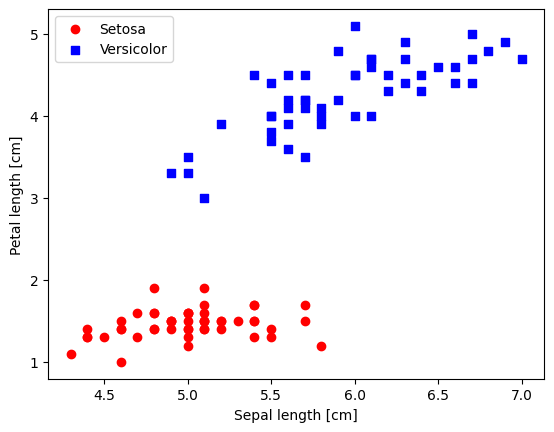

In [9]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100,4].values  # only 4th column
y = np.where(y=="Iris-setosa",0,1)
X = df.iloc[0:100,[0,2]].values # only 0 and 2 column

plt.scatter(X[:50,0],X[:50,1],
            color='red', marker='o', label='Setosa')

plt.scatter(X[50:100,0], X[50:100,1],
            color="blue", marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

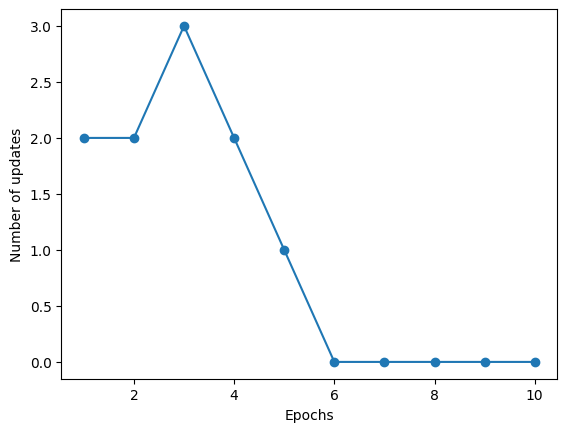

In [15]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

#visualization
plt.plot(range(1,len(ppn.errors_)+1),
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel("Number of updates")
plt.show()

In [16]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier, resolution=0.02):
  markers = ('o','s','^','v','<')
  colors = ('red','blue','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
  x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1

  xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max, resolution))

  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],
                y=X[y==cl,1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class{cl}',
                edgecolors='black')



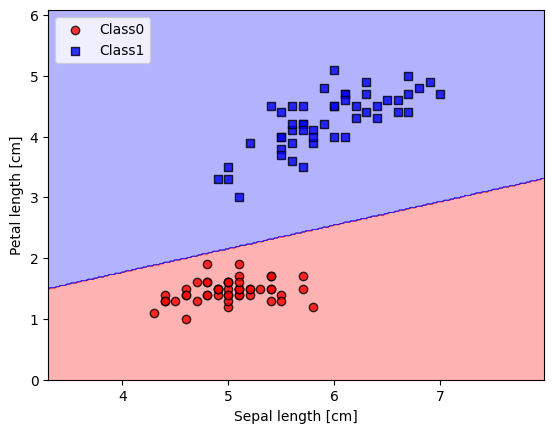

In [17]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()